In [ ]:
#!pip install pandas seaborn statsmodels sklearn openpyxl xlrd geopandas pysal ppscore

In [3]:
# General
import pandas as pd
import os
import scripts
import importlib
import numpy as np
import warnings

# Machine Learnign
## Sklearns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## Statmodels
from statsmodels.tools import add_constant
import statsmodels.api as sm

## Others
import ppscore as pps
from scipy.cluster.hierarchy import dendrogram, linkage

# Plot
from matplotlib import pyplot as plt
import seaborn as sns

# Geo
import geopandas as gpd
import libpysal
import splot
import esda
from splot.esda import moran_scatterplot, lisa_cluster
from pysal.model import spreg

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [80]:
importlib.reload(scripts)

<module 'scripts' from '/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/scripts.py'>

### Carregar Dados

In [4]:
df_jan = pd.read_csv('dataset/novo/municipio_jan vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_jan.head()

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,SaldoEmprego_01,Dens_Demográfica,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_jan_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_01,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,,,,,
1302603,Norte,AM,Manaus,1,0.625,762.54,878.0,158.06,49.86,10.97,4611.637209,2219580,4904.0,-2.970542
2507507,Nordeste,PB,João Pessoa,1,0.697,627.59,41.0,3421.30,49.91,18.61,4329.077250,817511,2702.0,5.858631
2304400,Nordeste,CE,Fortaleza,1,0.670,562.53,948.0,7786.52,45.93,13.73,5744.260562,2686612,6393.0,2.347699
2927408,Nordeste,BA,Salvador,1,0.753,727.33,1113.0,3859.35,52.28,14.59,5037.085869,2886698,6872.0,0.678999
2704302,Nordeste,AL,Maceió,1,0.640,401.42,-427.0,1854.12,41.83,14.24,4831.409966,1025360,2205.0,3.382282


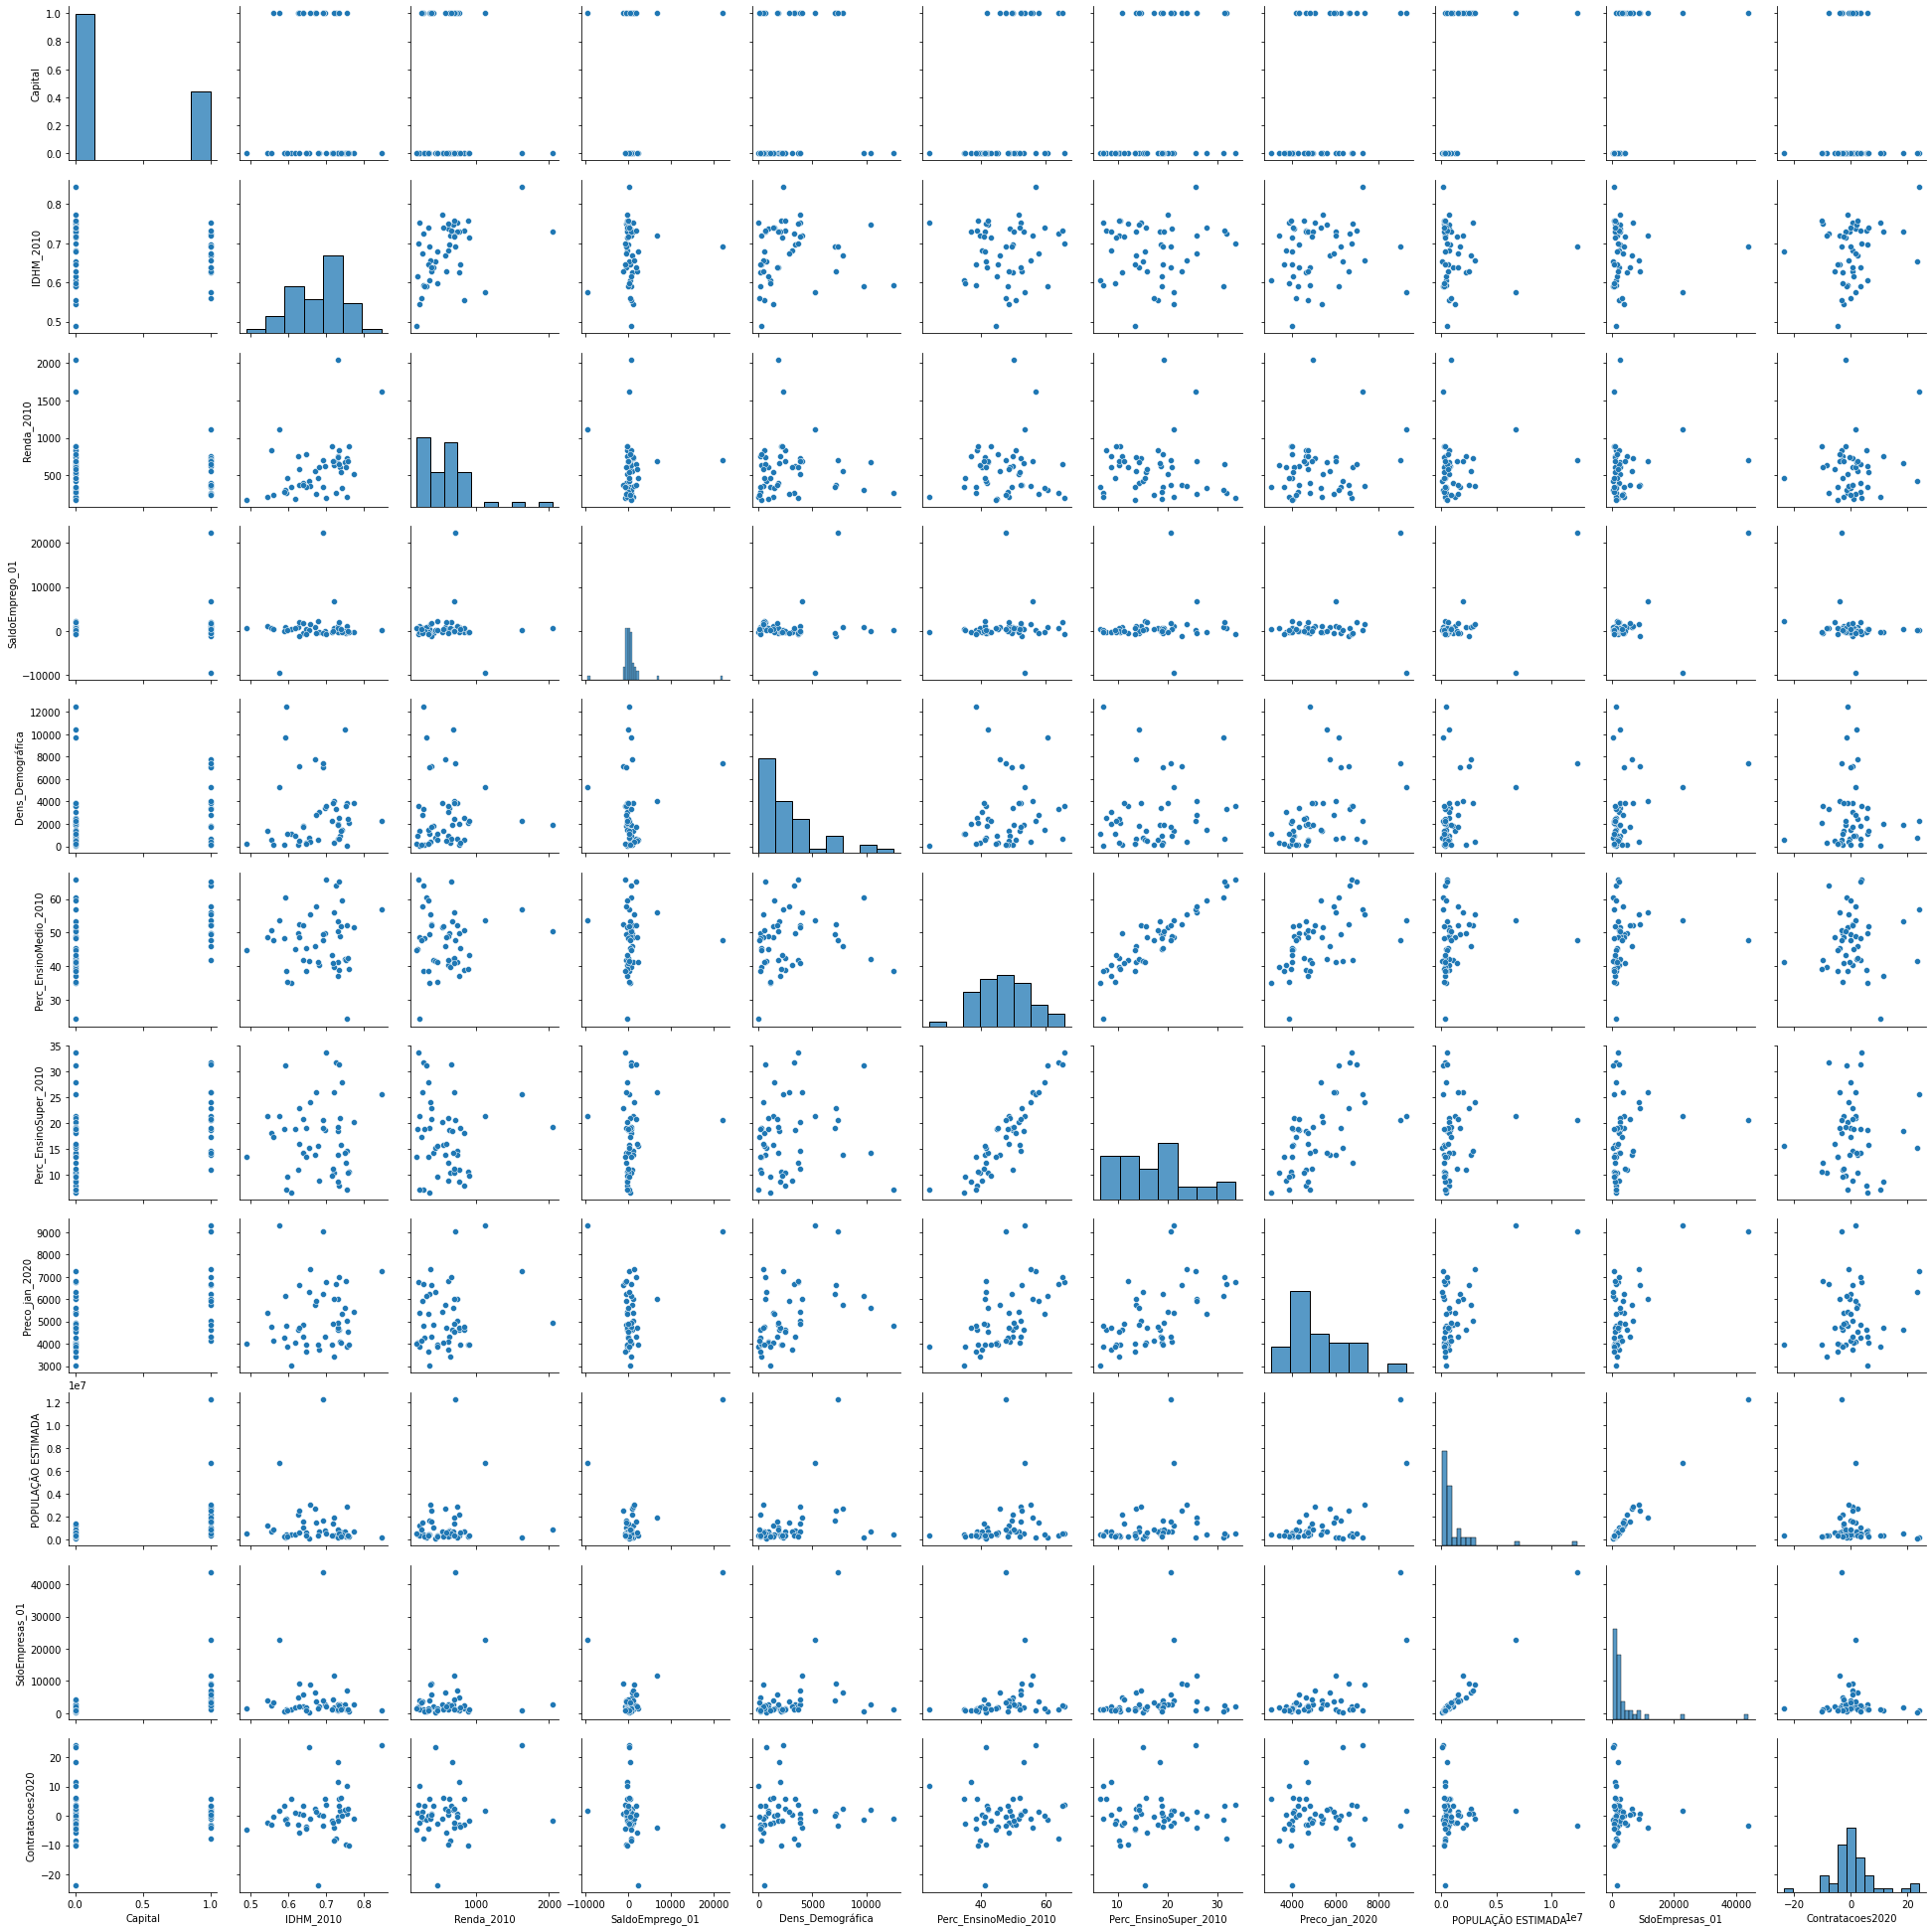

In [91]:
sns.pairplot(df_jan.iloc[:,3:])

plt.show()

In [5]:
df_dez = pd.read_csv('dataset/novo/municipio_dez vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_dez.head()

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,SaldoEmprego_12,Dens_Demográfica,casosAcumulado_12,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_dez_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_12,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,,,,,,
1302603,Norte,AM,Manaus,1,0.625,762.54,-1451.0,158.06,82218,49.86,10.97,5046.799519,2219580,23234.0,-2.970542
2507507,Nordeste,PB,João Pessoa,1,0.697,627.59,1553.0,3421.30,41879,49.91,18.61,4515.431694,817511,11219.0,5.858631
2304400,Nordeste,CE,Fortaleza,1,0.670,562.53,1804.0,7786.52,81893,45.93,13.73,5947.932900,2686612,29292.0,2.347699
2927408,Nordeste,BA,Salvador,1,0.753,727.33,523.0,3859.35,109906,52.28,14.59,5210.399506,2886698,33003.0,0.678999
2704302,Nordeste,AL,Maceió,1,0.640,401.42,840.0,1854.12,36320,41.83,14.24,5194.891963,1025360,10293.0,3.382282


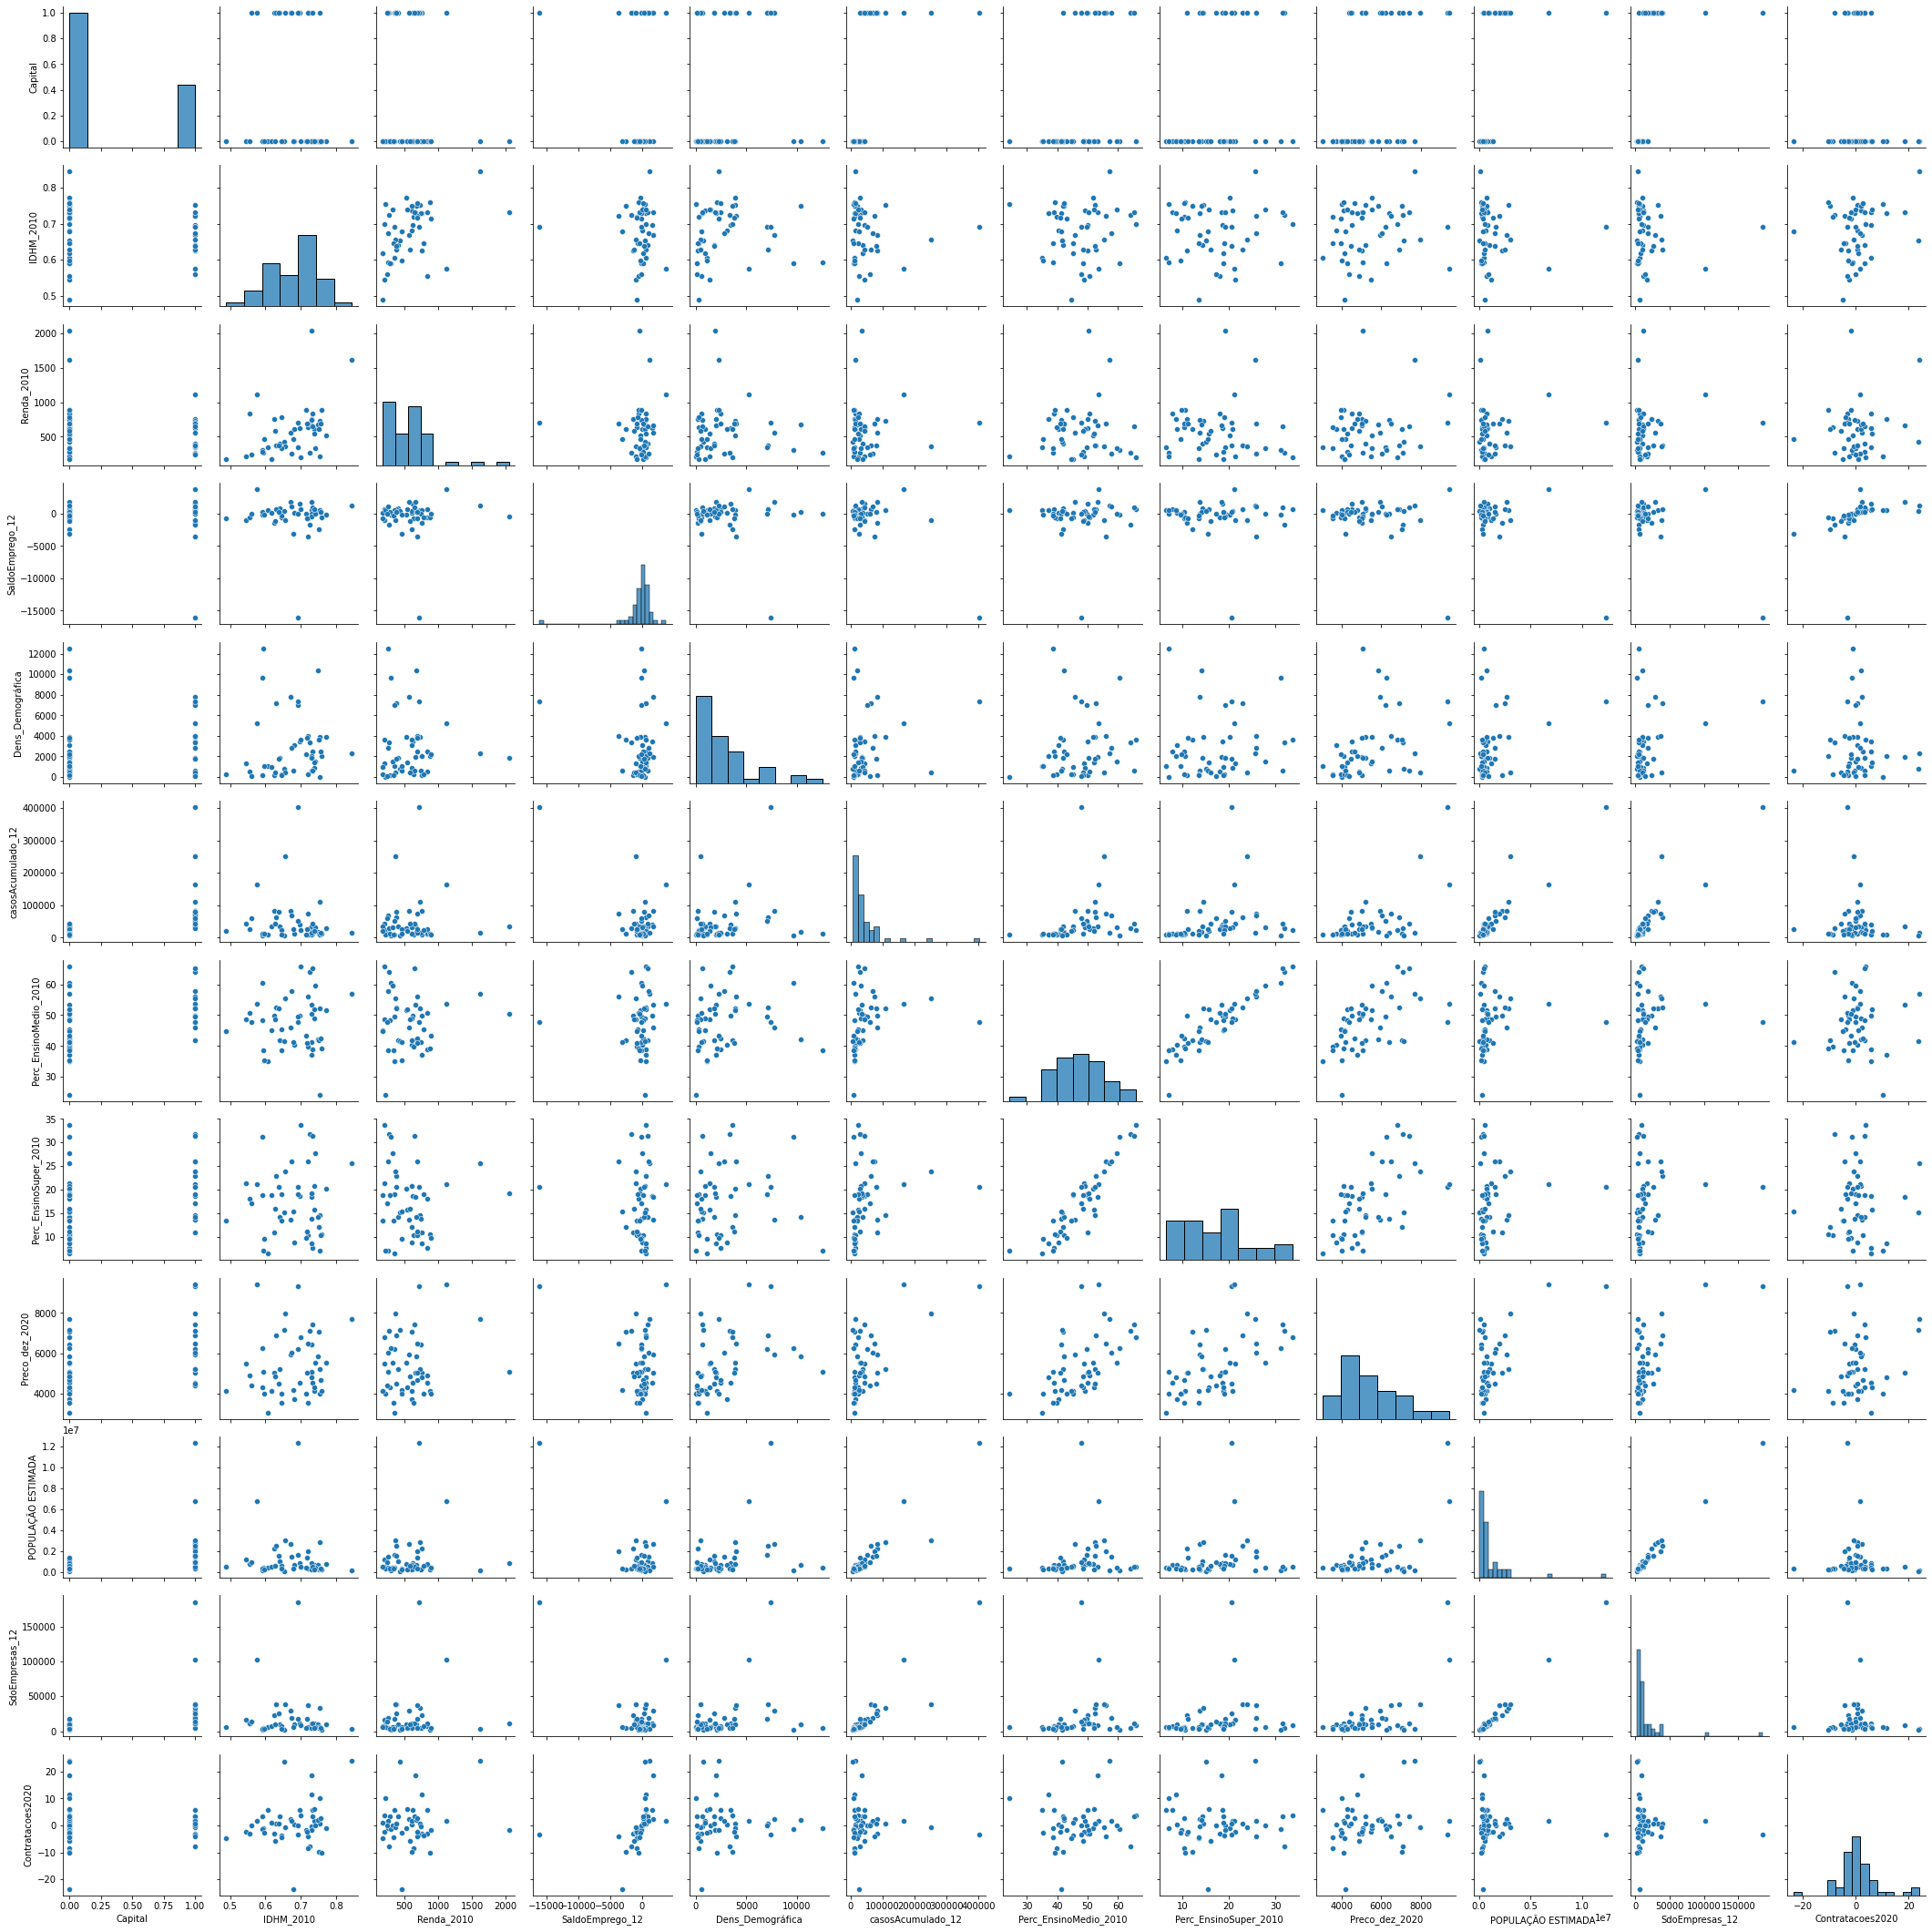

In [93]:
sns.pairplot(df_dez.iloc[:,3:])

plt.show()

In [6]:
df_var = pd.read_csv('dataset/novo/municipio_var vs 2.csv', sep = ';', decimal = ',', index_col = 0)

df_var.head()

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,Var_SaldoEmprego,Dens_Demográfica,casosAcumulado_12,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Variacao_preco,POPULAÇÃO ESTIMADA,SdoEmpresas_var,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,,,,,,
1302603,Norte,AM,Manaus,1,0.625,762.54,-2329.0,158.06,82218,49.86,10.97,435.162310,2219580,18330.0,-2.970542
2507507,Nordeste,PB,João Pessoa,1,0.697,627.59,1512.0,3421.30,41879,49.91,18.61,186.354444,817511,8517.0,5.858631
2304400,Nordeste,CE,Fortaleza,1,0.670,562.53,856.0,7786.52,81893,45.93,13.73,203.672337,2686612,22899.0,2.347699
2927408,Nordeste,BA,Salvador,1,0.753,727.33,-590.0,3859.35,109906,52.28,14.59,173.313637,2886698,26131.0,0.678999
2704302,Nordeste,AL,Maceió,1,0.640,401.42,1267.0,1854.12,36320,41.83,14.24,363.481996,1025360,8088.0,3.382282


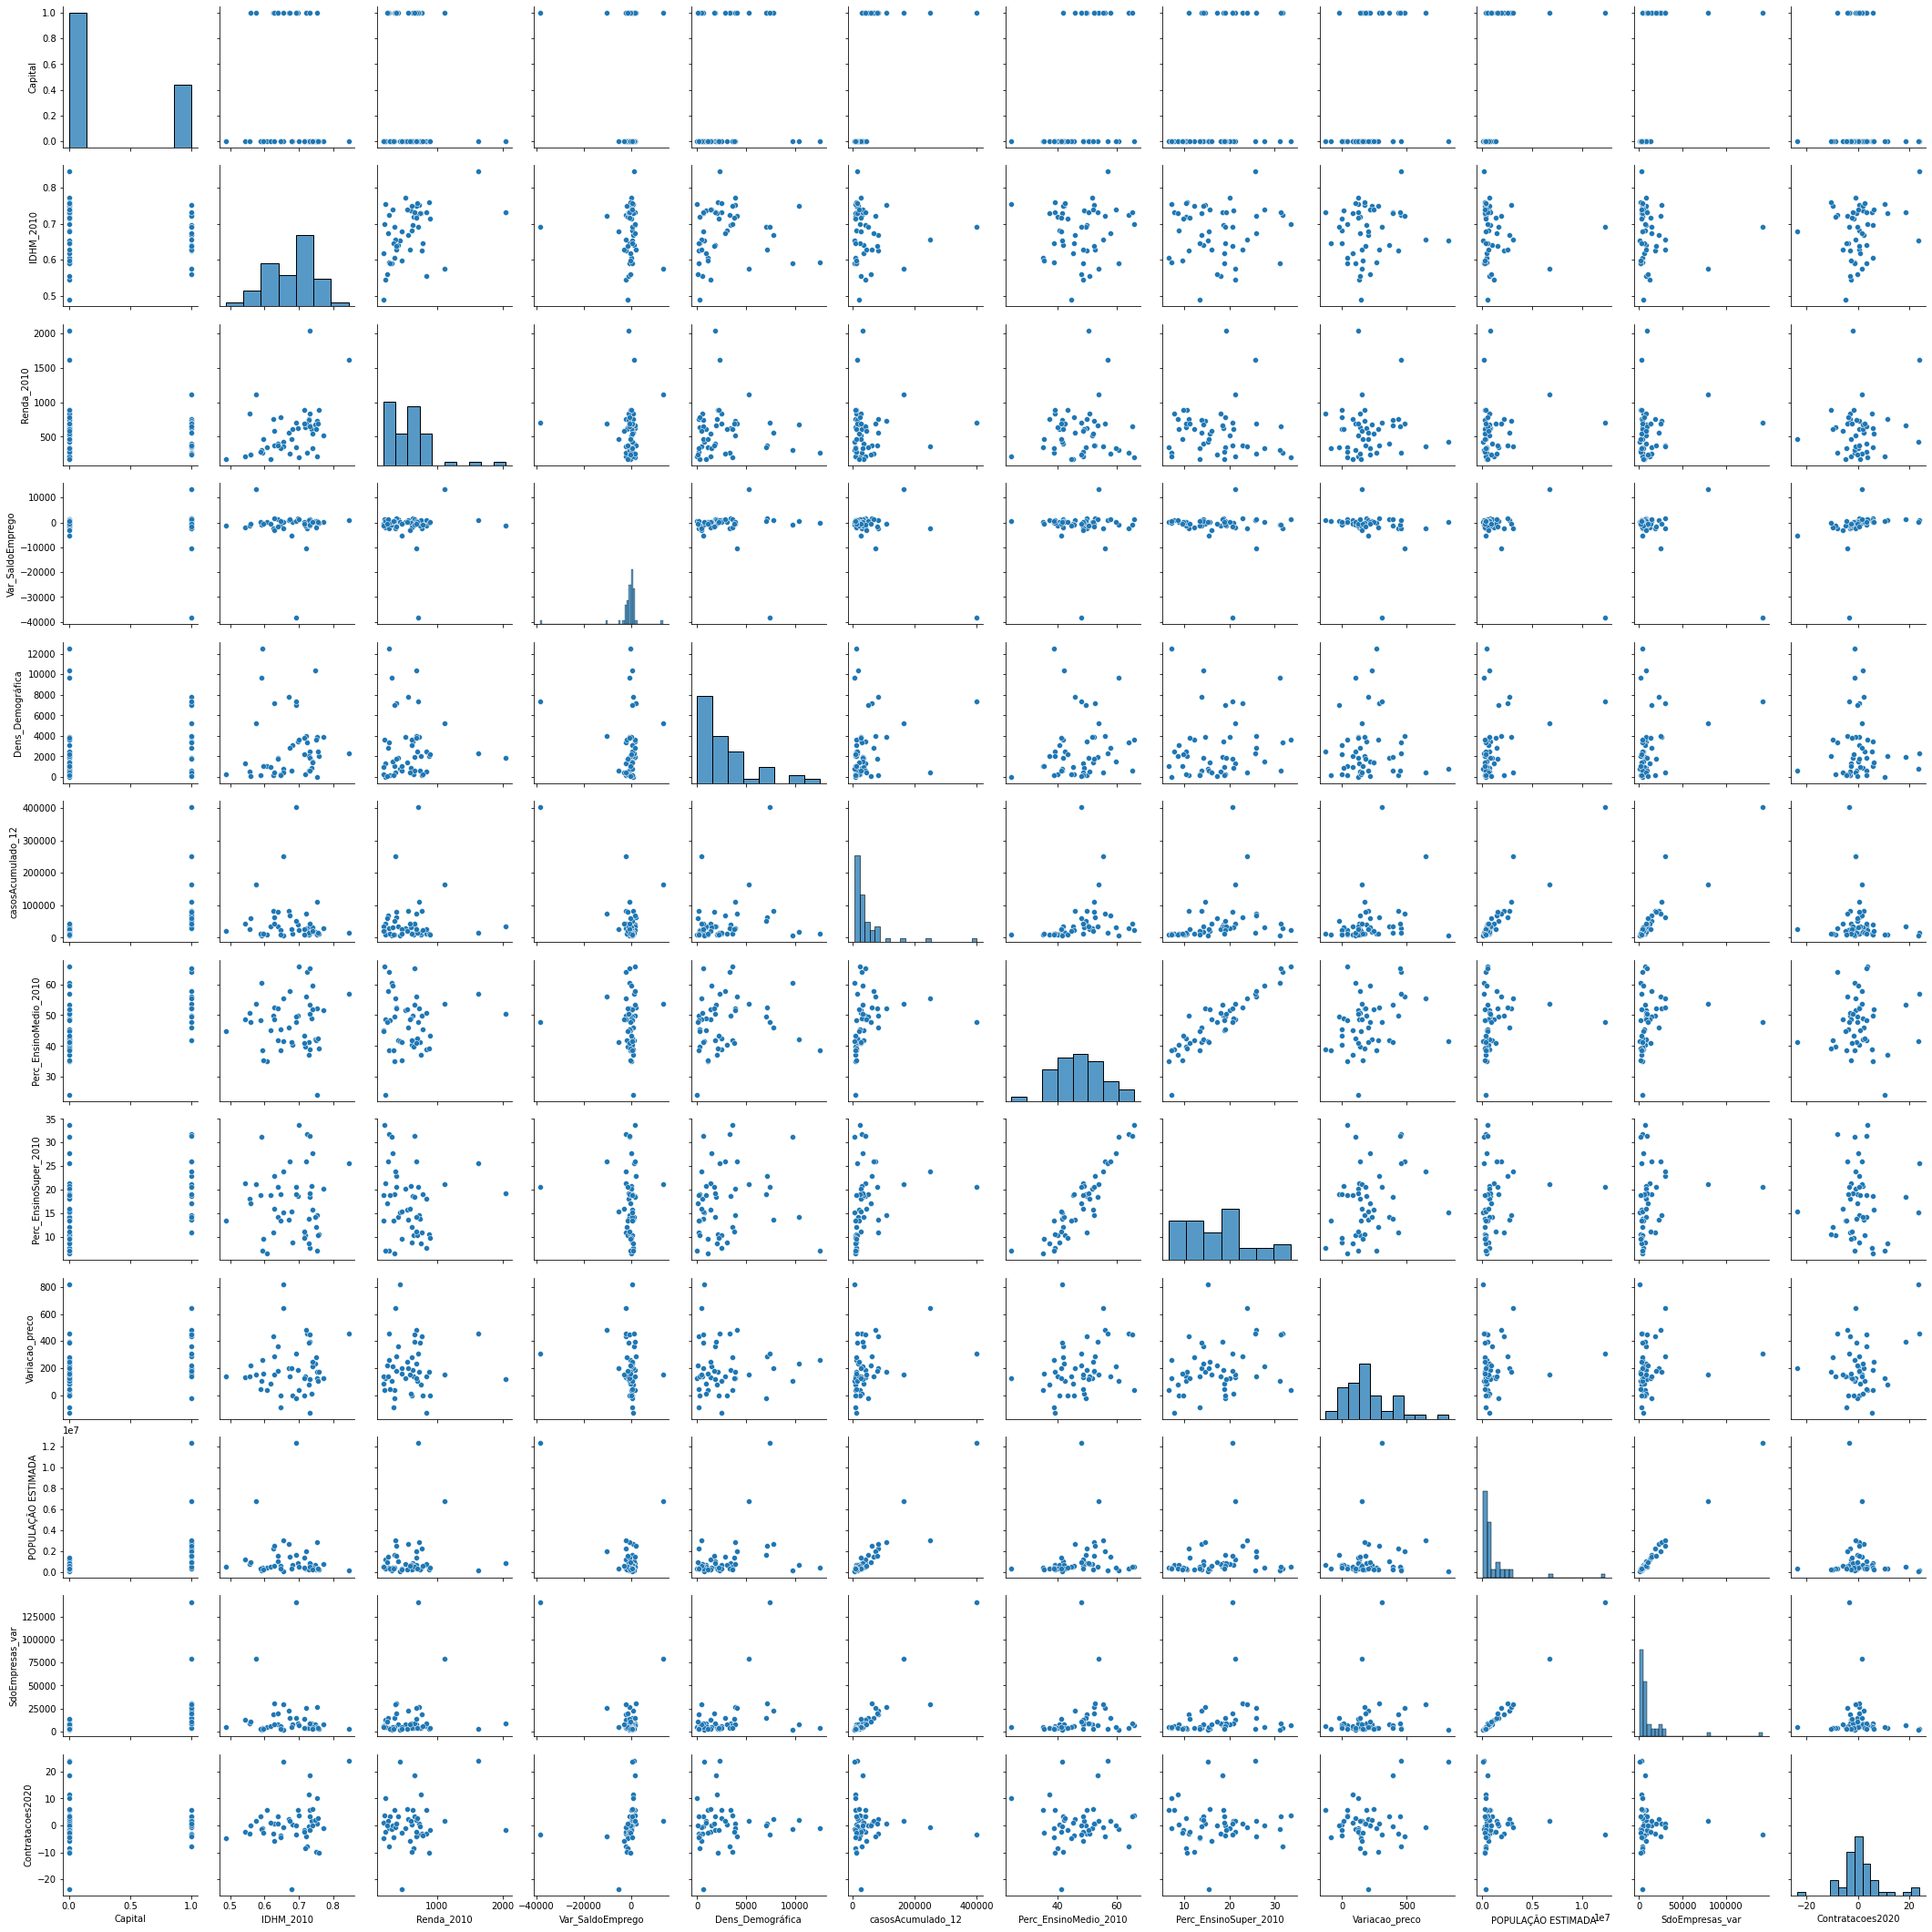

In [95]:
sns.pairplot(df_var.iloc[:,3:])

plt.show()

In [7]:
df = df_dez

In [1055]:
# df['Variacao_preco'] = (df_dez['Preco_dez_2020'] / df_jan['Preco_jan_2020']) - 1

### Carregas Municpios Espacial

In [8]:
# muncipios = pd.read_pickle('bases-gdrive/Dados Processados/municipios.pkl')

municipios = gpd.read_file('bases-gdrive/Shapefile/Munic_brasil/munic_brasil.shp', index_col = 0)

municipios.head()

,ID,AREA,GEOCODIGO,NOME,NOMECAPS,UF,CODUF,REGIAO,MESORREGIA,MICRORREGI,RM,POP2004,DENSDEMO,geometry
0,2,76680.43,1300201,Atalaia do Norte,ATALAIA DO NORTE,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,11023,0.14,"POLYGON ((-73.80098 -7.11146, -73.79617 -7.102..."
1,1,5474.51,1200336,Mâncio Lima,MANCIO LIMA,AC,12,Norte,VALE DO JURUA,CRUZEIRO DO SUL,None,11883,2.17,"POLYGON ((-73.80098 -7.11146, -73.73762 -7.134..."
2,12,8832.70,1300607,Benjamin Constant,BENJAMIN CONSTANT,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,25542,2.89,"POLYGON ((-70.13532 -4.28746, -70.12815 -4.293..."
3,23,3236.87,1304062,Tabatinga,TABATINGA,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,42652,13.18,"POLYGON ((-69.95428 -4.26597, -69.95329 -4.253..."
4,24,12363.85,1303700,Santo Antônio do Içá,SANTO ANTONIO DO ICA,AM,13,Norte,SUDOESTE AMAZONENSE,ALTO SOLIMOES,None,33421,2.70,"POLYGON ((-69.83709 -3.68623, -69.82498 -3.620..."


### Juntar Dados

In [9]:
esp_df = pd.merge(
    left = municipios,
    right = df,
    left_on = 'GEOCODIGO',
    right_index = True,
    how = 'right'
)

print(esp_df.shape)
esp_df.head()

(50, 29)


,ID,AREA,GEOCODIGO,NOME,NOMECAPS,UF_x,CODUF,REGIAO_x,MESORREGIA,MICRORREGI,...,Renda_2010,SaldoEmprego_12,Dens_Demográfica,casosAcumulado_12,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_dez_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_12,Contratacoes2020
949,127,11455.38,1302603,Manaus,MANAUS,AM,13,Norte,CENTRO AMAZONENSE,MANAUS,...,762.54,-1451.0,158.06,82218,49.86,10.97,5046.799519,2219580,23234.0,-2.970542
121,5792,214.06,2507507,João Pessoa,JOAO PESSOA,PB,25,Nordeste,MATA PARAIBANA,JOAO PESSOA,...,627.59,1553.0,3421.30,41879,49.91,18.61,4515.431694,817511,11219.0,5.858631
84,5052,320.12,2304400,Fortaleza,FORTALEZA,CE,23,Nordeste,METROPOLITANA DE FORTALEZA,FORTALEZA,...,562.53,1804.0,7786.52,81893,45.93,13.73,5947.932900,2686612,29292.0,2.347699
621,5883,319.86,2927408,Salvador,SALVADOR,BA,29,Nordeste,METROPOLITANA DE SALVADOR,SALVADOR,...,727.33,523.0,3859.35,109906,52.28,14.59,5210.399506,2886698,33003.0,0.678999
146,5581,516.46,2704302,Maceió,MACEIO,AL,27,Nordeste,LESTE ALAGOANO,MACEIO,...,401.42,840.0,1854.12,36320,41.83,14.24,5194.891963,1025360,10293.0,3.382282


In [ ]:
esp_df.drop(['MESORREGIA', 'MESORREGIA', 'NOME'], axis = 1).to_file('Shapefiles/Municipio-Jan/')

In [99]:
# df = df[df['Mun_IBGE'] != 'São Paulo (SP)']

In [100]:
# df = pd.merge(
#     right = municipios[['POP2004', 'GEOCODIGO']],
#     left = df,
#     right_on = 'GEOCODIGO',
#     left_index = True,
#     how = 'left'
# )

In [101]:
df.head()

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,SaldoEmprego_01,Dens_Demográfica,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_jan_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_01,Contratacoes2020,POP2004,GEOCODIGO
949,Norte,AM,Manaus,1,0.625,762.54,878.0,158.06,49.86,10.97,4611.637209,2219580,4904.0,-2.970542,1592555,1302603
121,Nordeste,PB,João Pessoa,1,0.697,627.59,41.0,3421.30,49.91,18.61,4329.077250,817511,2702.0,5.858631,649410,2507507
84,Nordeste,CE,Fortaleza,1,0.670,562.53,948.0,7786.52,45.93,13.73,5744.260562,2686612,6393.0,2.347699,2332657,2304400
621,Nordeste,BA,Salvador,1,0.753,727.33,1113.0,3859.35,52.28,14.59,5037.085869,2886698,6872.0,0.678999,2631831,2927408
146,Nordeste,AL,Maceió,1,0.640,401.42,-427.0,1854.12,41.83,14.24,4831.409966,1025360,2205.0,3.382282,884320,2704302


### Selecionar dados para modelos

In [11]:
target = 'Preco_dez_2020'

x = df.iloc[:,3:].drop([target], axis = 1)

labels = x.columns

y = df[target]

x_y = pd.merge(x, y, left_index=True, right_index=True)

x.head()

,Capital,IDHM_2010,Renda_2010,SaldoEmprego_12,Dens_Demográfica,casosAcumulado_12,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,POPULAÇÃO ESTIMADA,SdoEmpresas_12,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,,
1302603,1,0.625,762.54,-1451.0,158.06,82218,49.86,10.97,2219580,23234.0,-2.970542
2507507,1,0.697,627.59,1553.0,3421.30,41879,49.91,18.61,817511,11219.0,5.858631
2304400,1,0.670,562.53,1804.0,7786.52,81893,45.93,13.73,2686612,29292.0,2.347699
2927408,1,0.753,727.33,523.0,3859.35,109906,52.28,14.59,2886698,33003.0,0.678999
2704302,1,0.640,401.42,840.0,1854.12,36320,41.83,14.24,1025360,10293.0,3.382282


### Correlações

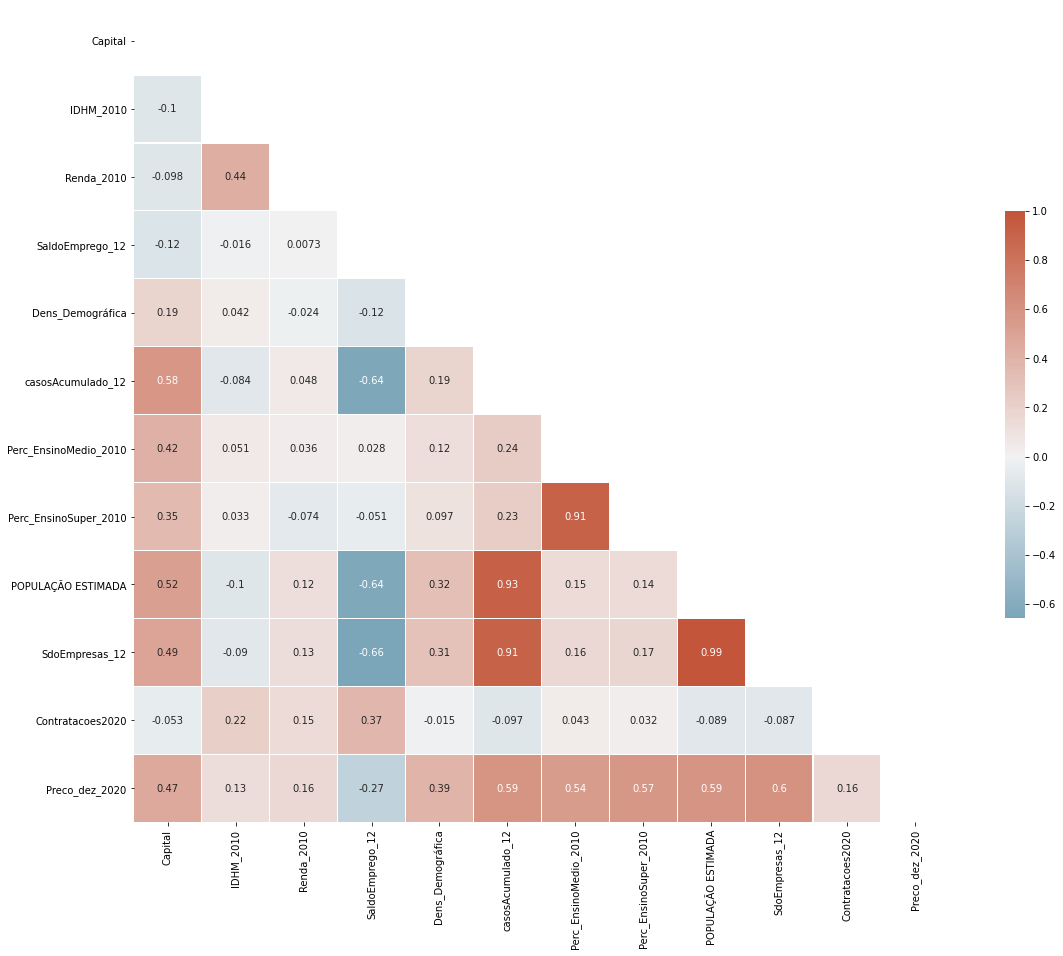

In [12]:
scripts.corr(x_y, figsize = (20,15))

### PPS index

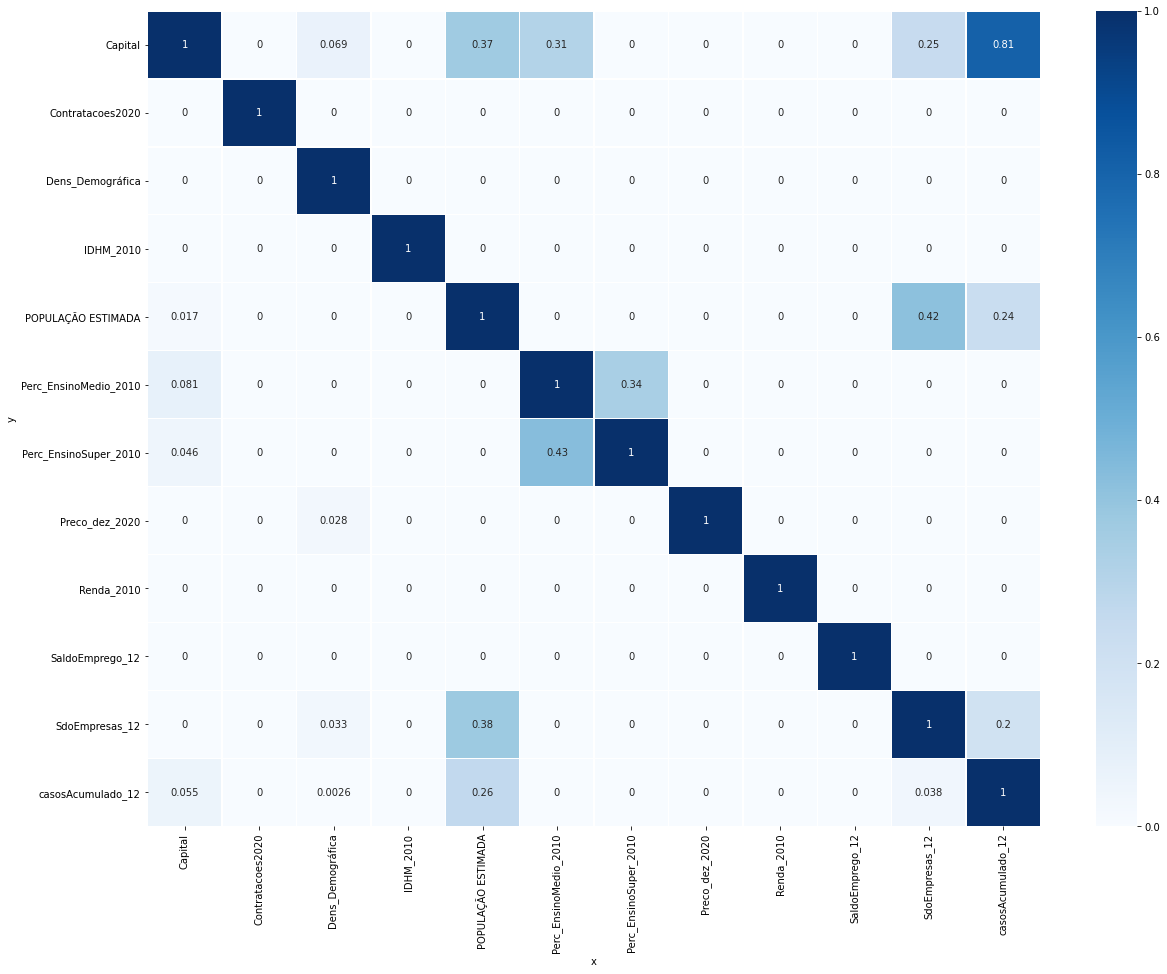

In [13]:
plt.figure(figsize=(20, 15))

matrix_df = pps.matrix(x_y)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

plt.show()

### Remoção de Variáveis com alta correlação

In [15]:
drop_labels = [
    'Perc_EnsinoSuper_2010', 'SdoEmpresas_12', 'POPULAÇÃO ESTIMADA'
]

x = x.drop(axis = 1, 
           labels = drop_labels
          )

labels = x.columns

x_y = pd.merge(x, y, left_index=True, right_index=True)


x.head()

,Capital,IDHM_2010,Renda_2010,SaldoEmprego_12,Dens_Demográfica,casosAcumulado_12,Perc_EnsinoMedio_2010,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,
1302603,1,0.625,762.54,-1451.0,158.06,82218,49.86,-2.970542
2507507,1,0.697,627.59,1553.0,3421.30,41879,49.91,5.858631
2304400,1,0.670,562.53,1804.0,7786.52,81893,45.93,2.347699
2927408,1,0.753,727.33,523.0,3859.35,109906,52.28,0.678999
2704302,1,0.640,401.42,840.0,1854.12,36320,41.83,3.382282


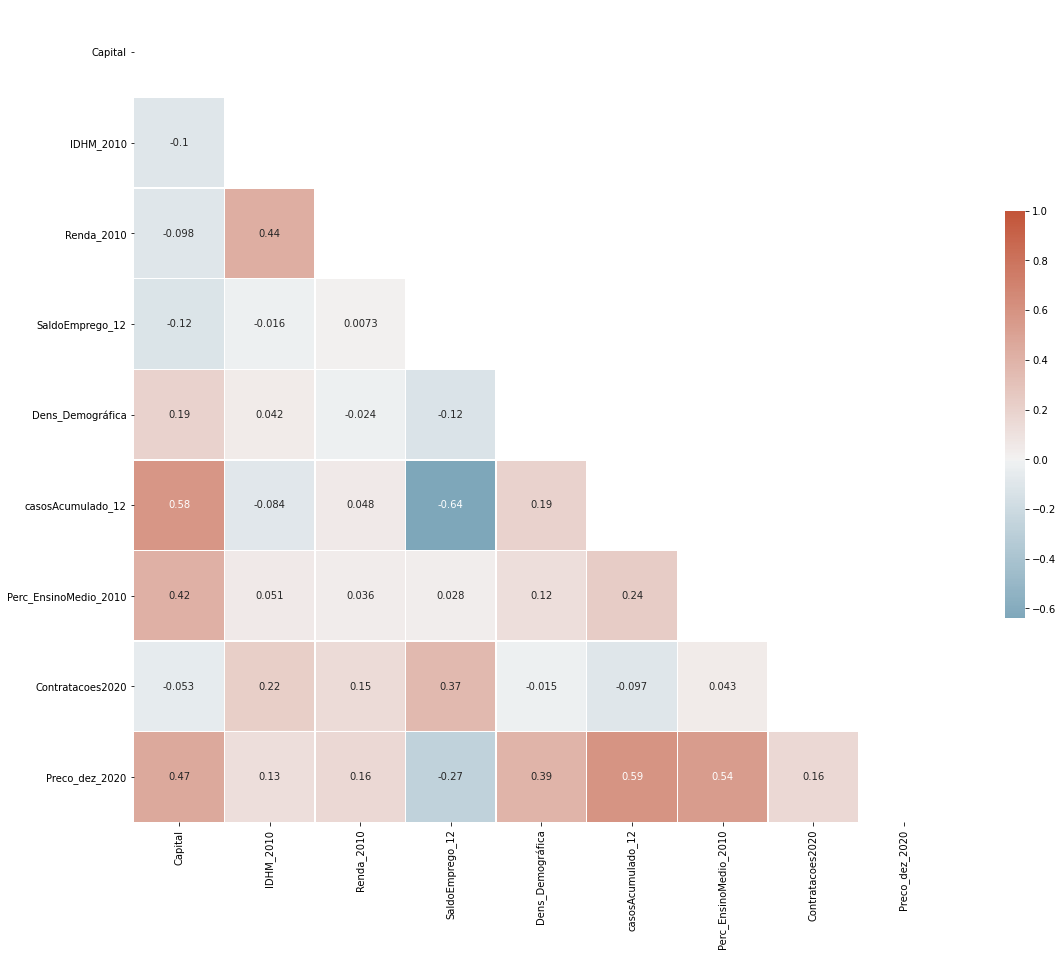

In [16]:
scripts.corr(x_y, figsize = (20,15))

#### Ajuste Variáveis

In [17]:
x.skew()

Capital                  0.795820
IDHM_2010               -0.422680
Renda_2010               2.082535
SaldoEmprego_12         -4.827852
Dens_Demográfica         1.664844
casosAcumulado_12        3.870558
Perc_EnsinoMedio_2010    0.062961
Contratacoes2020         0.635182
dtype: float64

In [18]:
x.kurtosis()

Capital                  -1.425366
IDHM_2010                -0.117557
Renda_2010                6.737616
SaldoEmprego_12          29.535468
Dens_Demográfica          2.525127
casosAcumulado_12        17.394687
Perc_EnsinoMedio_2010     0.298522
Contratacoes2020          3.670246
dtype: float64

### Realizar Normalização

In [19]:
x_norm = pd.DataFrame(StandardScaler().fit_transform(x), columns = x.columns, index = x.index)

x_y_norm = pd.DataFrame(StandardScaler().fit_transform(x_y), columns = x_y.columns, index = x_y.index)

### Regressão Linear

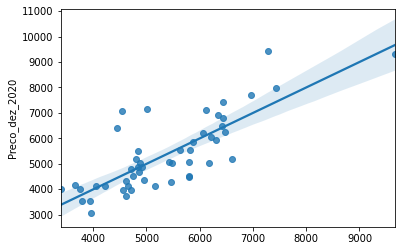

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Preco_dez_2020   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     8.952
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           5.33e-07
Time:                        16:39:30   Log-Likelihood:                -409.50
No. Observations:                  50   AIC:                             837.0
Df Residuals:                      41   BIC:                             854.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5373.3959    136.218     39.447      0.000    5098.298    5648.494
Capital                  37.2557    199.538      0.187      0.853    -365.719     440.231
IDHM_2010                84.0314    160.176      0.525      0.603    -239.451     407.513
Renda_2010              119.4213    156.140      0.765      0.449    -195.909     434.751
SaldoEmprego_12         -59.4593    223.859     -0.266      0.792    -511.551     392.632
Dens_Demográfica        370.0944    140.352      2.637      0.012      86.647     653.542
casosAcumulado_12       620.8558    256.376      2.422      0.020     103.094    1138.617
Perc_EnsinoMedio_2010   551.0652    152.531      3.613      0.001     243.023     859.107
Contratacoes2020        264.9748    157.950      1.678      0.101     -54.012     583.962
==============================================================================
Omnibus:                       10.756   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.451
Skew:                           0.983   Prob(JB):                      0.00538
Kurtosis:                       4.074   Cond. No.                         3.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lm = sm.OLS(endog = y, exog = add_constant(x_norm))

r = lm.fit()

sns.regplot(x = r.predict(add_constant(x_norm)), y = y)

plt.show()

r.summary()

#### Stepwise Critério AIC

In [21]:
drop, aic_remaing, labels_remaining = scripts.iterate_aic(x_norm, y)

drop

['Perc_EnsinoMedio_2010',
 'Dens_Demográfica',
 'casosAcumulado_12',
 'Capital',
 'SaldoEmprego_12']

#### Cross Validation

Results
MSE: 1660022.137
RMSE: 1288.418
MAE: 903.903
R2: 0.206


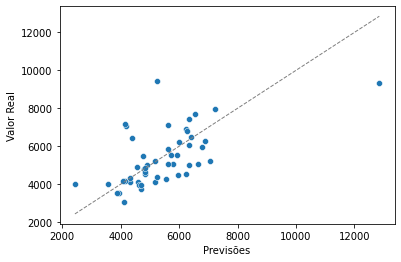

In [22]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, LinearRegression(), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

### PCA

In [23]:
pca = PCA(n_components = 2)

pca_coord = pca.fit_transform(x_y_norm)

### KMeans

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

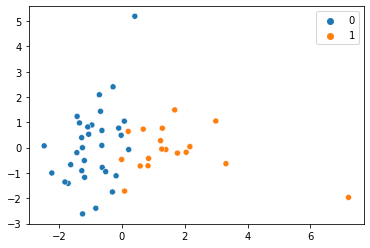

In [24]:
kmeans = KMeans(n_clusters = 2).fit_transform(x_y_norm)

sns.scatterplot(pca_coord[:,0], pca_coord[:,1], hue = kmeans.argmax(axis = 1), )

In [25]:
pd.DataFrame({'Cidade': df.MUNICIPIO_DESCRICAO, 'Cluster': kmeans.argmax(axis = 1)}).sort_values(by = 'Cluster')

,Cidade,Cluster
MUNICIPIO_IBGE,,
3534401,Osasco,0
4318705,São Leopoldo,0
3548500,Santos,0
4202008,Balneário Camboriú,0
3548708,São Bernardo do Campo,0
3541000,Praia Grande,0
3505708,Barueri,0
4304606,Canoas,0
4305108,Caxias do Sul,0


##### Outlier

In [26]:
df[pca_coord[:,0] > 5]

,REGIAO,UF,MUNICIPIO_DESCRICAO,Capital,IDHM_2010,Renda_2010,SaldoEmprego_12,Dens_Demográfica,casosAcumulado_12,Perc_EnsinoMedio_2010,Perc_EnsinoSuper_2010,Preco_dez_2020,POPULAÇÃO ESTIMADA,SdoEmpresas_12,Contratacoes2020
MUNICIPIO_IBGE,,,,,,,,,,,,,,,
3550308,Sudeste,SP,São Paulo (território),1,0.692,710.04,-16103.0,7387.69,401718,47.88,20.63,9329.249053,12325232,185148.0,-3.284015


Removendo Outliers

/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


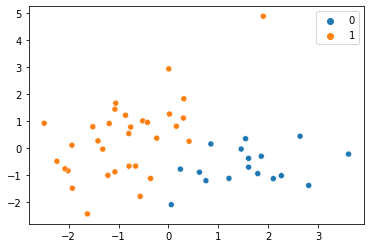

,Cidade,Cluster
MUNICIPIO_IBGE,,
1302603,Manaus,0
4314902,Porto Alegre,0
5300108,Brasília,0
4205407,Florianópolis,0
4106902,Curitiba,0
5002704,Campo Grande,0
3304557,Rio de Janeiro (território),0
3205309,Vitória,0
3303302,Niterói,0


In [27]:
slicer = pca_coord[:,0] < 5

pca = PCA(n_components = 2)

pca_coord_new = pca.fit_transform(x_y_norm.values[slicer])

kmeans_new = KMeans(n_clusters = 2).fit_transform(x_y_norm.values[slicer])

sns.scatterplot(pca_coord_new[:,0], pca_coord_new[:,1], hue = kmeans_new.argmax(axis = 1), )

plt.show()

pd.DataFrame({'Cidade': df.MUNICIPIO_DESCRICAO[slicer], 'Cluster': kmeans_new.argmax(axis = 1)}).sort_values(by = 'Cluster')

### Cluster Dendograma

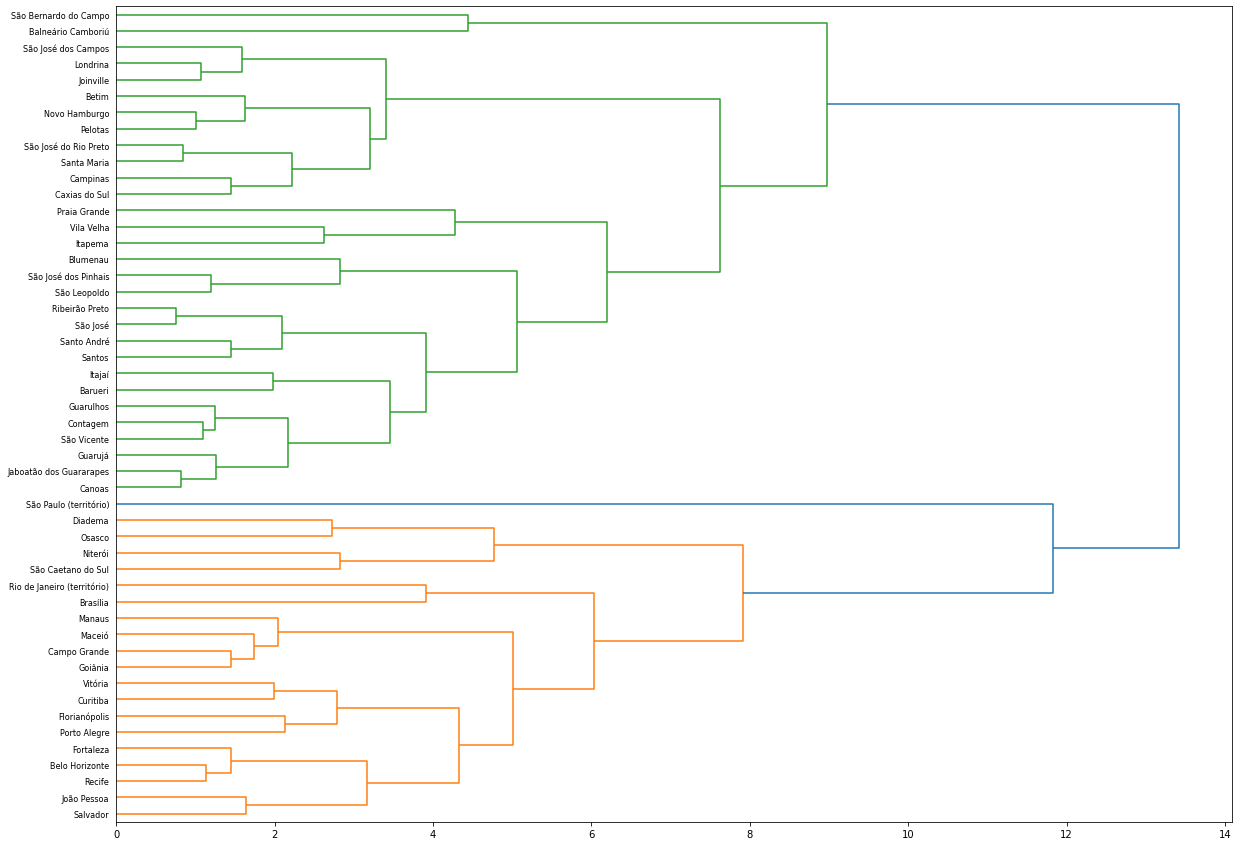

In [28]:
linked = linkage(x_y_norm.values, 'ward')

plt.figure(figsize=(20, 15))
dendrogram(
            linked,
            orientation='right',
            labels=df.MUNICIPIO_DESCRICAO.values,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

### Regressão Espacial

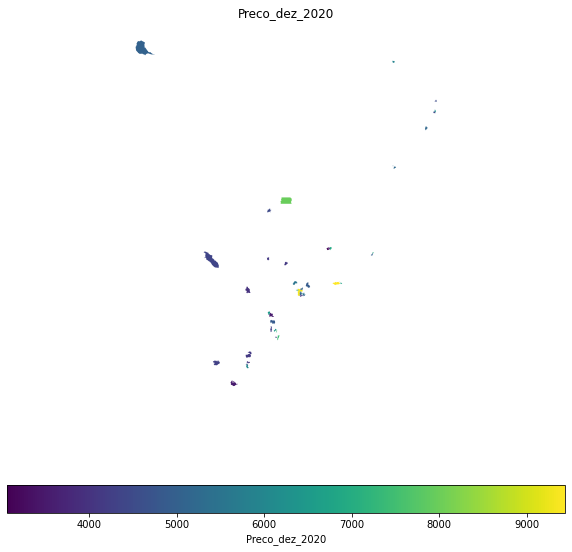

In [29]:
ax = esp_df.plot(
    column = target,
    figsize = (10,10),
    legend = True,
    legend_kwds = {'label': target, 'orientation': "horizontal"},
)

ax.set_title(target)

ax.set_axis_off()

In [30]:
esp_df.shape

(50, 29)

In [31]:
# w = libpysal.weights.Queen.from_dataframe(df, )
# w = libpysal.weights.Voronoi.from_dataframe(df.centroid, )

w = libpysal.weights.DistanceBand.from_dataframe(esp_df, 3)

# TODO método queen com base na distância ou método

w.transform = 'r'

('WARNING: ', 949, ' is an island (no neighbors)')
('WARNING: ', 84, ' is an island (no neighbors)')
('WARNING: ', 621, ' is an island (no neighbors)')
('WARNING: ', 1902, ' is an island (no neighbors)')


/Users/matheus/Documents/MBA FGV/Desafios e Requisitos dos Projetos Analíticos/venv-gv/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 10 disconnected components.
 There are 4 islands with ids: 949, 84, 621, 1902.
  warnings.warn(message)


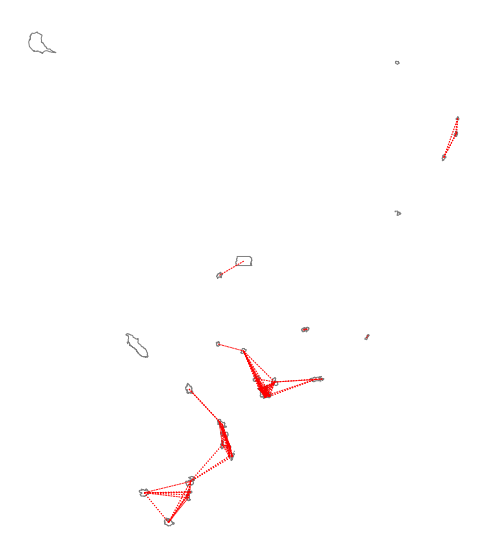

In [32]:
ax = esp_df.plot(edgecolor='grey', facecolor='w',figsize=(10,10))
f, ax = w.plot(esp_df, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''),
              )
ax.set_axis_off()

In [33]:
moran_I = {}
moran = {}
moran_local = {}

for i in x_y_norm.columns:
    
    moran[i] = esda.Moran(x_y_norm[i].values, w)
#     moran_local[i] = esda.moran.Moran_Local(x_y_norm[i].values, w)
    moran_I[i] = moran[i].I

In [34]:
(pd.Series(moran_I)
     .rename('Moran I')
     .sort_values(ascending = False)
     .to_frame()
)

,Moran I
Capital,0.119664
Dens_Demográfica,0.112315
Perc_EnsinoMedio_2010,0.100335
casosAcumulado_12,0.030393
SaldoEmprego_12,-0.001960
Preco_dez_2020,-0.010012
IDHM_2010,-0.011437
Renda_2010,-0.038490
Contratacoes2020,-0.156145


Capital


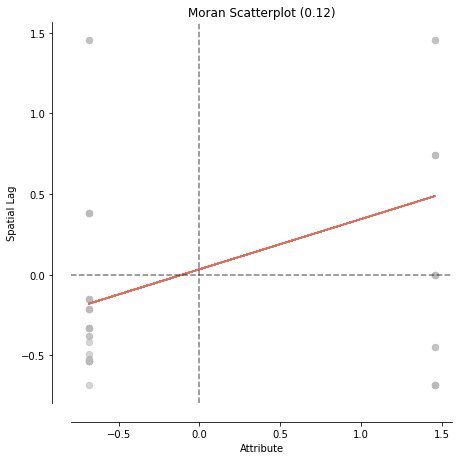

Dens_Demográfica


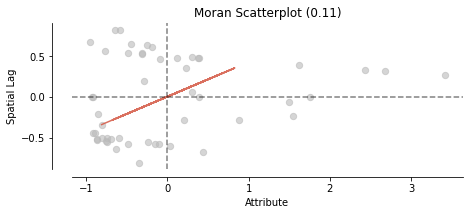

Perc_EnsinoMedio_2010


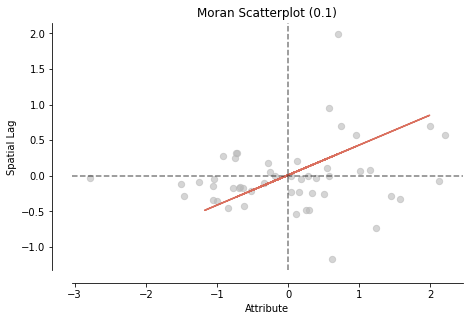

casosAcumulado_12


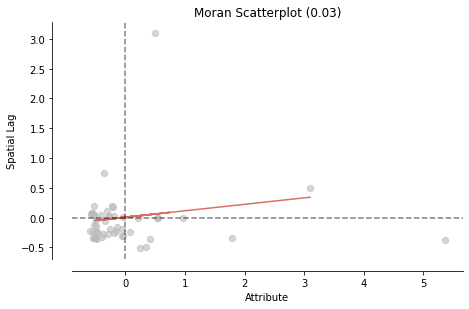

In [35]:
n = 4

for i in sorted(moran_I.items(), key=lambda x: x[1], reverse=True)[:n]:
    print(i[0])
    moran_scatterplot(moran[i[0]], aspect_equal=True)
    plt.show()

In [36]:
r = spreg.OLS(
        x = x_norm.values, name_x = list(labels),
        y = y.values, 
        w = w,
    )

print(r.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:          50
Mean dependent var  :   5373.3959                Number of Variables   :           9
S.D. dependent var  :   1460.2584                Degrees of Freedom    :          41
R-squared           :      0.6359
Adjusted R-squared  :      0.5649
Sum squared residual:38038575.397                F-statistic           :      8.9525
Sigma-square        :  927770.132                Prob(F-statistic)     :   5.331e-07
S.E. of regression  :     963.208                Log likelihood        :    -409.499
Sigma-square ML     :  760771.508                Akaike info criterion :     836.998
S.E of regression ML:    872.2222                Schwarz criterion     :     854.206

-----------------------------------------------------------------------------

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :       preco                Number of Observations:          50
Mean dependent var  :   5373.3959                Number of Variables   :          10
S.D. dependent var  :   1460.2584                Degrees of Freedom    :          40
Pseudo R-squared    :      0.6137
Spatial Pseudo R-squared:  0.6100

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT    5774.3022537    1007.7008527       5.7301750       0.0000000
             Capital     -40.9527925     269.6280149      -0.1518863       0.8792766
           IDHM_2010      99.7060157     154.4935747       

<AxesSubplot:ylabel='Preco_dez_2020'>

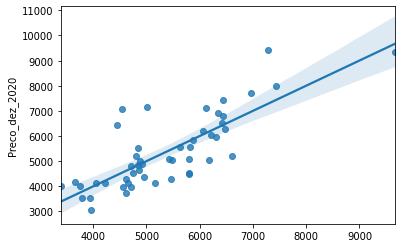

In [37]:

spatial_regression = spreg.GM_Lag(
        x = x_norm.values, name_x = list(labels),
        y = y.values, name_y = 'preco',
        w = w,
    
        
    )

print(
    spatial_regression.summary
)

sns.regplot(x = r.predy, y = y)

### Random Forests

In [38]:
rf = RandomForestRegressor(n_estimators = 200)

rf.fit(y = y, X = x_norm)

RandomForestRegressor(n_estimators=200)

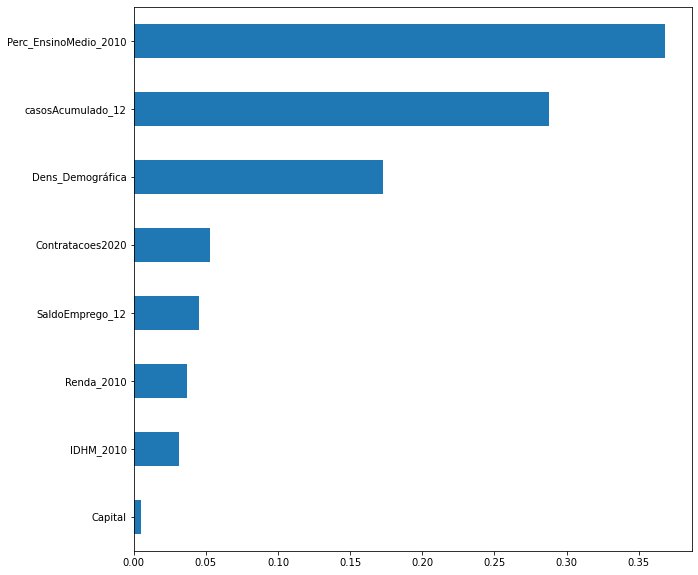

In [39]:
pd.Series(rf.feature_importances_, index = labels).sort_values().plot.barh(figsize = (10,10))

plt.show()

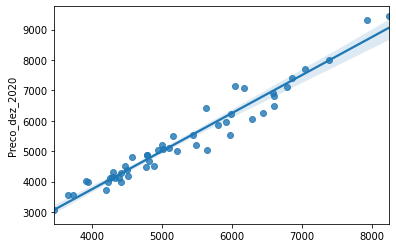

In [40]:
sns.regplot(x = rf.predict(x_norm), y = y)

plt.show()

Results
MSE: 1438258.715
RMSE: 1199.274
MAE: 875.955
R2: 0.312


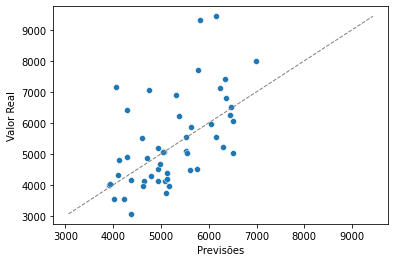

In [41]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, RandomForestRegressor(n_estimators = 50), folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

#### Recursive Feature Eliminations

In [42]:
selector_rf = RFE(rf, n_features_to_select=.5, step=1)

selector_rf = selector_rf.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_rf.ranking_, index = labels).sort_values()

Best Features


Dens_Demográfica         1
casosAcumulado_12        1
Perc_EnsinoMedio_2010    1
Contratacoes2020         1
SaldoEmprego_12          2
Renda_2010               3
IDHM_2010                4
Capital                  5
dtype: int64

### Linear Support Vector Regression

In [43]:
svr = SVR(kernel = 'linear')

svr = svr.fit(y = y, X = x_norm)

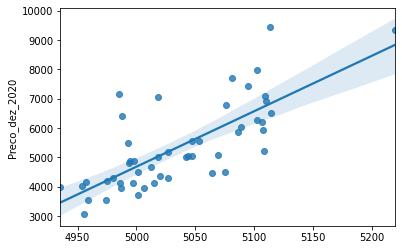

In [44]:
sns.regplot(x = svr.predict(x_norm), y = y)

plt.show()

Results
MSE: 2139955.109
RMSE: 1462.859
MAE: 1109.125
R2: -0.024


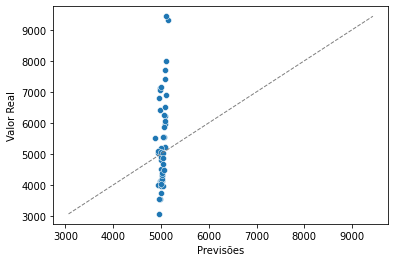

In [45]:
pred = scripts.out_of_fold_pred(x_norm.values, y.values, svr, folds = 10)

m = scripts.get_metrics(prediction = pred, actual = y.values)

In [46]:
selector_svr = RFE(SVR(kernel='linear'), n_features_to_select=.5, step=1)

selector_svr = selector_svr.fit(x_norm.values, y.values)

print('Best Features')
pd.Series(selector_svr.ranking_, index = labels).sort_values()

Best Features


Capital                  1
Dens_Demográfica         1
casosAcumulado_12        1
Perc_EnsinoMedio_2010    1
IDHM_2010                2
SaldoEmprego_12          3
Renda_2010               4
Contratacoes2020         5
dtype: int64

In [47]:
pd.DataFrame(
    {
    'RF Feature Importance': np.argsort(-rf.feature_importances_),
    'RF RFE': selector_rf.ranking_,
    'SVR RFE': selector_svr.ranking_
},
    index = labels
)

,RF Feature Importance,RF RFE,SVR RFE
Capital,6,5,1
IDHM_2010,5,4,2
Renda_2010,4,3,4
SaldoEmprego_12,7,2,3
Dens_Demográfica,3,1,1
casosAcumulado_12,2,1,1
Perc_EnsinoMedio_2010,1,1,1
Contratacoes2020,0,1,5
